In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_df=pd.read_csv("sample_data//mnist_train_small.csv",header=None,prefix='var')
test_df=pd.read_csv("sample_data//mnist_test.csv",header=None,prefix='var')

In [ ]:
x_train=train_df.drop(['var0'],axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y1=train_df['var0']
y_train=y1.to_numpy()
y_train=np.vstack(y_train)
y_train.shape

(20000, 1)

In [ ]:
x_test=test_df.drop(['var0'], axis=1).values
print(x_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
y2=test_df['var0']
y_test=y2.to_numpy()
y_test=np.vstack(y_test)
print(y_test)

[[7]
 [2]
 [1]
 ...
 [4]
 [5]
 [6]]


In [ ]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=minmax.fit_transform(x_train)
x_test=minmax.fit_transform(x_test)


In [ ]:
def initialize_para(x,y,input_layer_size):
  para={}
  for i in range(1,len(input_layer_size)+2):
    if i==1:
      para['W'+str(i)]=np.random.rand(input_layer_size[i-1],len(x.T))-0.5
      para['B'+str(i)]=np.random.rand(input_layer_size[i-1],1)-0.5
    elif i==(len(input_layer_size)+1):
      para['W'+str(i)]=np.random.rand(y.max()+1,input_layer_size[i-2])-0.5
      para['B'+str(i)]=np.random.rand(y.max()+1,1)-0.5
    else:
      para['W'+str(i)]=np.random.rand(input_layer_size[i-1],input_layer_size[i-2])-0.5
      para['B'+str(i)]=np.random.rand(input_layer_size[i-1],1)-0.5
  return para

In [ ]:
def sigmoid(Z):
  return np.exp(Z)/(1+np.exp(Z))
def relu(z):
  return np.maximum(z,0)

In [ ]:
def sig_dev(Z):
  return Z*(1-Z)
def relu_dev(z):
  return z>0

In [ ]:
def forward_propagation(para,X):
  values={}
  for i in range(1,len(para)//2+1):
    if i==1:
      values['Z'+str(i)]=np.dot(para['W'+str(i)],X)+para['B'+str(i)]
      values['A'+str(i)]=sigmoid(values['Z'+str(i)])
    else:
          values['Z' + str(i)] = np.dot(para['W' + str(i)], values['A' + str(i-1)]) + para['B' + str(i)]
          
          if i==len(para)//2:
              values['A' + str(i)] = sigmoid(values['Z' + str(i)])
              
          else:
              values['A' + str(i)] = relu(values['Z' + str(i)])
              
  return values

In [ ]:
def y_expected(Y):
  y_exp=np.zeros((Y.size,10))
  y_exp[np.arange(Y.size),Y]=1
  y_exp=y_exp.T
  return y_exp

In [ ]:
def backward_propagation(Y,X,para,values):
  y_exp=y_expected(Y)
  grads={}
  for i in range(len(values)//2,0,-1):
    if i==len(values)//2 :
      dA=(values['A'+str(i)]-y_exp)
      dZ=dA*sig_dev(values['A'+str(i)])
    else:
      dA=np.dot(para['W'+str(i+1)].T,dZ)/Y.size
      
      dZ=dA*relu_dev(values['A' + str(i)])
      
    if i==1:
      grads['W' + str(i)] = np.dot(dZ, X.T)/Y.size
      
      grads['B' + str(i)] = np.sum(dZ, axis=1, keepdims=True)/Y.size
      
    else:
      grads['W' + str(i)] = np.dot(dZ,values['A' + str(i-1)].T)/Y.size
     
      grads['B' + str(i)] =  np.sum(dZ, axis=1, keepdims=True)/Y.size
     
  return grads
      

In [ ]:
def update_parameters(para,grads,learning_rate):
    para_updated = {}
    for i in range(1,len(para)//2+1):
        para_updated['W' + str(i)] = para['W' + str(i)]  - learning_rate * grads['W' + str(i)]
       
        para_updated['B' + str(i)] = para['B' + str(i)] - learning_rate * grads['B' + str(i)]
    
    return para_updated

In [ ]:
def get_predictions(Z):
  return np.argmax(Z,0)

In [ ]:
def compute_cost(values,Y):
  y_pred=get_predictions(values)
  cost=np.sum((y_pred-Y)**2)/Y.size
  return cost

In [ ]:
def get_accuracy(predictions, Y):
  correct_predictions=np.sum(predictions==Y)
  return correct_predictions/Y.size

In [ ]:
def model(X_train, Y_train, input_layer_size, num_iters, learning_rate,parameter):
    if not parameter :
      parameters = initialize_para(X_train,Y_train,input_layer_size)
    else :
      parameters = parameter
    for i in range(1,len(input_layer_size)+2):
      print(f"Weights {str(i)} :{parameters['W'+str(i)].shape } Bais {str(i)} : {parameters['B'+str(i)].shape} \n")
    cost=np.zeros((1,num_iters))
    for i in range(num_iters):
      prediction=np.zeros((1,Y_train.size))
      output_layer=np.zeros((Y_train.max()+1,Y_train.size))
      for j in range(1,len(X_train)//100+1):
        X=X_train[(j-1)*100:j*100].T
        Y=Y_train[(j-1)*100:j*100].T
        values = forward_propagation(parameters,X)
        grads =backward_propagation(Y,X,parameters,values)
        parameters = update_parameters(parameters,grads,learning_rate)
        prediction[0][(j-1)*100:j*100]=get_predictions(values['A'+str(len(values)//2)])
        output_layer[:,(j-1)*100:j*100]=values['A'+str(len(values)//2)]
      cost[0][i]=compute_cost(output_layer,Y_train.T)
      
      if i % 10 == 0 or i==num_iters-1:
          print("Iteration: ", i)
          print(prediction,Y_train.T)
          print("Cost:",cost[0][i],"Equal values:",np.sum(prediction==Y_train.T))
    return parameters

In [ ]:
layer_sizes=[100,80]
parameter=model(x_train,y_train,input_layer_size=layer_sizes,num_iters=1000,learning_rate=0.01,parameter=False)

In [ ]:
layer_sizes=[100,80]
parameter_new=model(x_train,y_train,input_layer_size=layer_sizes,num_iters=5000,learning_rate=0.01,parameter=parameter_new)

Weights 1 :(100, 784) Bais 1 : (100, 1) 

Weights 2 :(80, 100) Bais 2 : (80, 1) 

Weights 3 :(10, 80) Bais 3 : (10, 1) 

Iteration:  0
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.18855 Equal values: 16134
Iteration:  10
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1827 Equal values: 16138
Iteration:  20
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1797 Equal values: 16145
Iteration:  30
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1752 Equal values: 16153
Iteration:  40
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1698 Equal values: 16160
Iteration:  50
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1606 Equal values: 16169
Iteration:  60
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1577 Equal values: 16173
Iteration:  70
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.14005 Equal values: 16186
Iteration:  80
[[2. 5. 0. ... 2. 9. 0.]] [[6 5 7 ... 2 9 5]]
Cost: 3.1338 Equal values: 16193
Iteration:  90
[[2. 5. 0. ... 2.

In [ ]:
#Training accuracy
value = forward_propagation(parameter_new,x_train.T)
get_accuracy(get_predictions(value['A'+str(len(value)//2)]),y_train.T)

0.8618

In [ ]:
#Test accuracy
value = forward_propagation(parameter_new,x_test.T)
predictions=get_predictions(value['A'+str(len(value)//2)]),y_test.T
get_accuracy(get_predictions(value['A'+str(len(value)//2)]),y_test.T)

0.8558

In [ ]:
x =test_df.drop(['var0'], axis=1).values
x=np.reshape(x,(10000,28,28))
predictions=predictions[0]

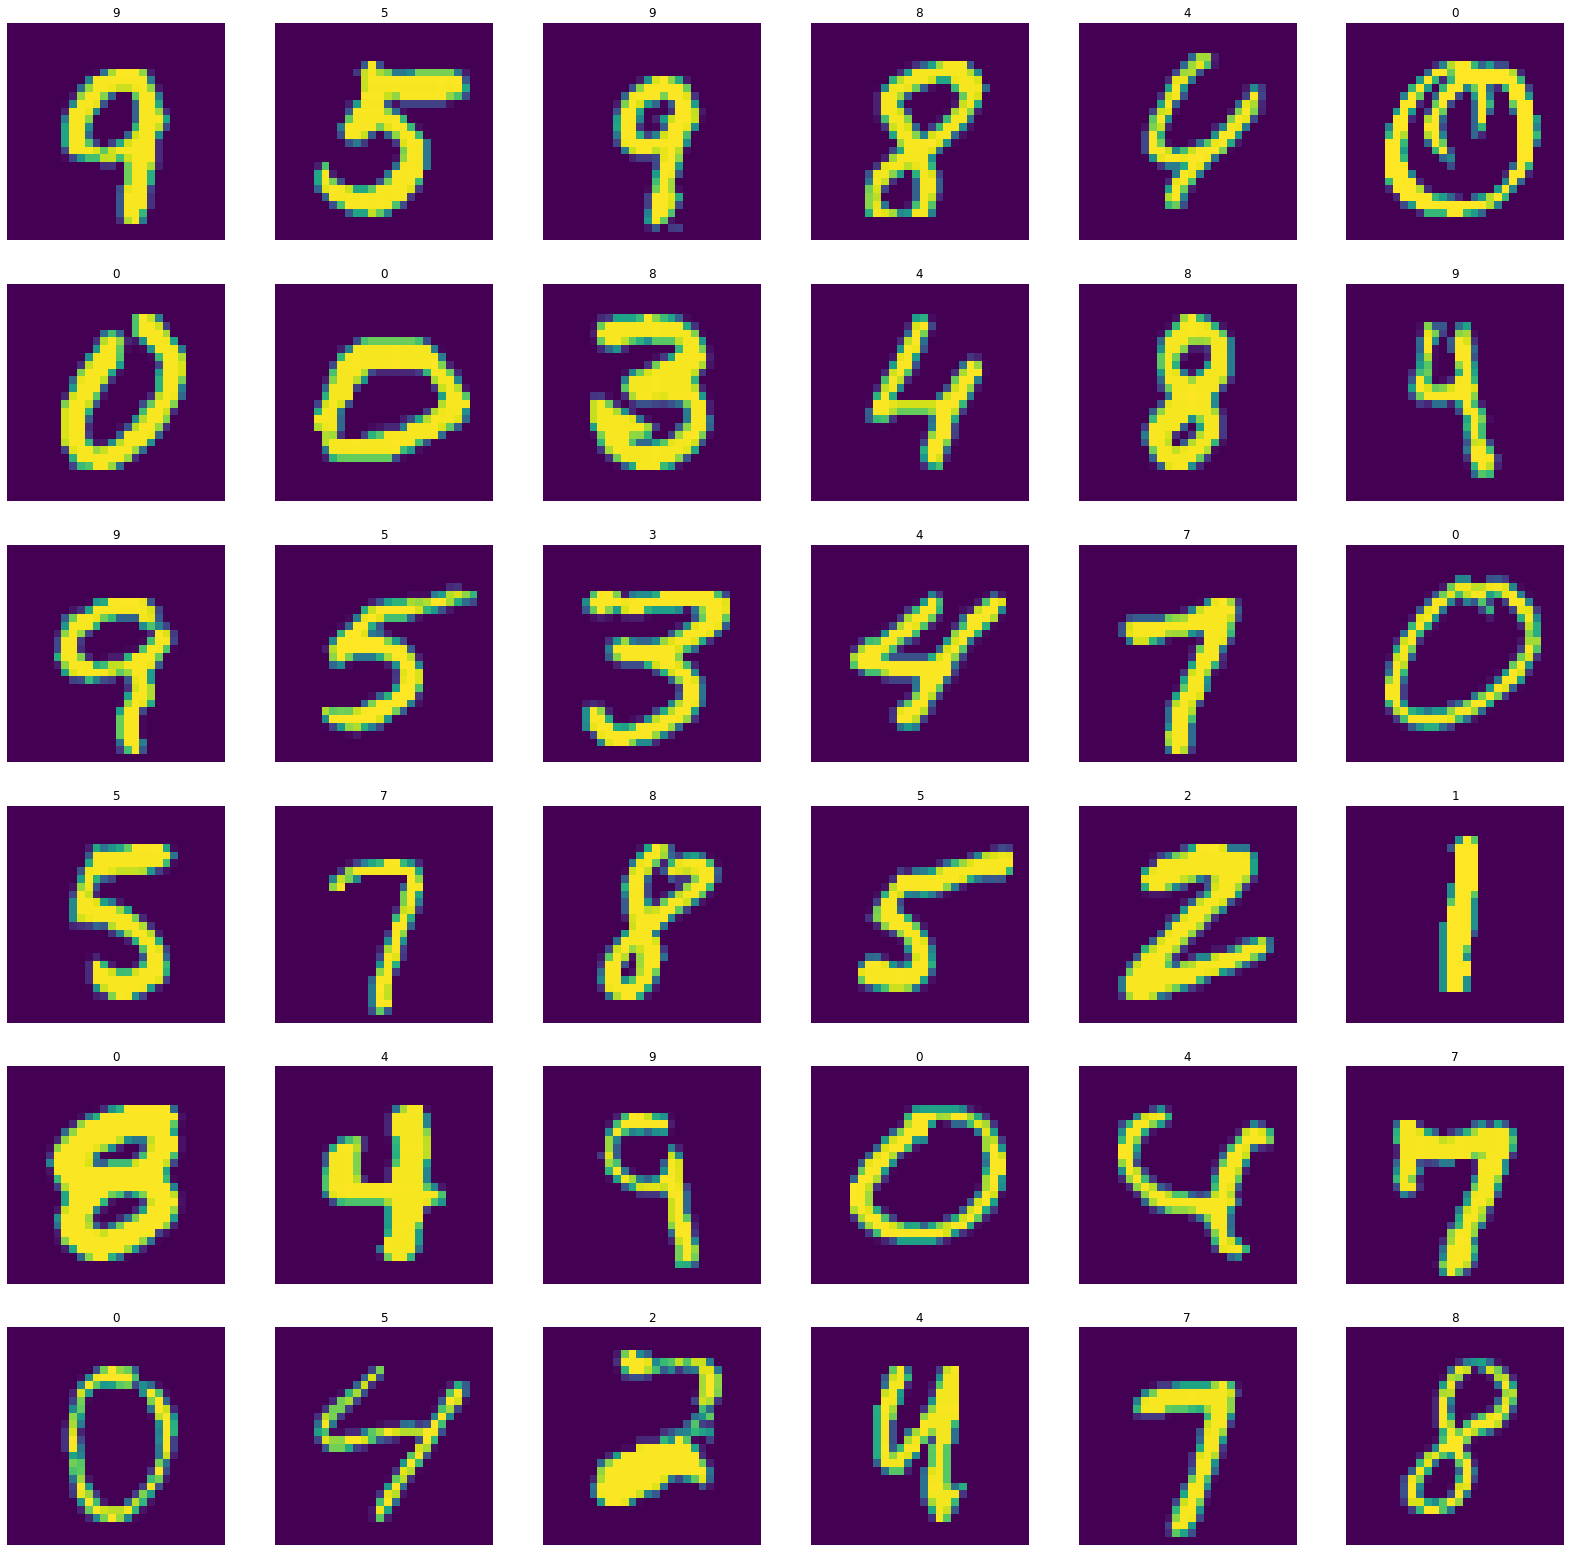

In [ ]:
#Visualization of predictions made by model
plt.figure(figsize=(28,28))
for n,i in enumerate(list(np.random.randint(0,len(x),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(x[i])
  plt.axis('off')
  plt.title(predictions[i])